# Sampling

## Sample

A sample(n) is a subset of data from larger dataset generally called population(N).

## Random Sampling 

- Select Items randomly from population, either with or without replacement(no duplicates: something is selected in sample then probability of that value to be selected again is 0).
- Random choice.
- A process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import animation
from IPython import display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## selected randomly 

np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=False)

array([23, 56, 12, 17])

In [3]:
np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=True)

array([23, 12,  5, 11])

> Data quality in data science involves completeness,
consistency of format, cleanliness, and accuracy of individual data points.
Statistics adds the notion of representativeness

## Sampling Bias

when sample is selected in nonrandom way from a large population.
A sample that misrepresents the population.


### Self Selection Bias 

> In real world lets take movie review or reviews in general. People volunteerly going and giving review to a particular, creates a bias in statistical results. Because the reviewers are not randomly selected, these reviewers are generally who dislikes the item or belong to a group already or generally writes review for every item, selected themselves creating **self selection bias**.

### Statistical Bias
 
> Statisitcal bias refers to sampling error that are produced by sampling process. like gun shooting at a target. conceptually is should generate a random errors(doesn't the target). 

Bias occurs when measurements or observations are systematically in error because they are not
representative of the full population.

**Unbiased data examples**

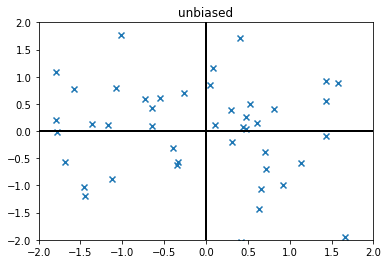

In [4]:
unbiased_data = np.random.normal(scale=1,size=(50,2))

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("unbiased")
plt.scatter(unbiased_data[...,0],unbiased_data[...,1],marker='x')


**Biased data examples**

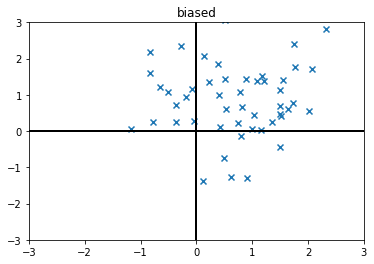

In [5]:
biased_data = np.random.normal(size=(50,2)) + 0.7

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("biased")
plt.scatter(biased_data[...,0],biased_data[...,1],marker='x')

### Selection Bias

> selectively choosing data- consciously or unconsciously, that it leads to misleading conclusion.

## Random Seeding 

- To get random choice generated but has to be generated everytime has to be same for peer checking or to generate same results. Get same randomly generated sequence everytime if seed value is determined.
- **SEED** is a value sets initial state of random number generator.


In [6]:
## It will generate same random number everytime 
np.random.seed(100)
np.random.rand()

0.5434049417909654

## Random Variable

- A set of all possible outcomes of a random experiment is called <b>SAMPLE SPACE</b>
- probability of all outcomes : Probability Distribution
- Random Variable maps to one of the outcomes of the sample space.

## Standard Error of Mean (SEM)

Standard error explains variability in the sampling distribution.

Standard Error (SE): $\frac{s}{\sqrt{n}}$

$s = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}$

s = Standard Deviation\
n = number of samples

- SE decreases as sample size increases.
$SE \propto \frac{1}{\sqrt{n}}$

- To calculate take a sample from population calculate mean, standard deviation and standard error and repeat with another sample.
    > but this is statistically wasteful. But turns out it is not necessary to create a new sample everytime instead `bootstrap` resampling can be used. It has become a standard way to estimate standard error(doesn't rely on Central limit theorem)
    
    
**Standard deviation calculates variability of individual data point and Standard error measures variability of a sample metric.**

`MEASURE OF SPREAD of population is standard deviation and for a sample of that population is standard error.`

> Then it would make sense that standard error(spread of the data from mean) would decrease with the increase of sample size.

In [7]:
import numpy as np

In [8]:
from scipy.stats import sem

In [9]:
n = 1000
x = np.random.normal(size=(n,))

$SE = \frac{\sigma}{\sqrt{n}}$

In [10]:
x.std(ddof=1) / np.sqrt(n)

0.032288264878170665

In [11]:
sem(x,ddof=1)

0.032288264878170665

## Bootstrap

Drawing additional `samples with replacement` from sample itself(basically resampling) and recalculate the statistics. This procedure is called bootstrap. 

> Bootstrap is replicating the original sample many times creating  a hypothetical population that it just contains information of original sample but larger.

> In practice we dont create replicas of the samples again and again. We just replace observations after each draw from the original sample. in this way probability for each observation to be drawn from the original sample remains same and bootstrap process can choose duplicates also.

### Bootstrap resampling of the mean
1. Draw a sample, put it in record.
1. Replace sample values and repeat it k times.
1. Record the mean of k resampled values.
1. Repeat the process 1-3 n times.
1. now after these n iterations with results
   1. Calculate std dev and this estimates samples mean SE.
   1. produce distribution
   1. find confidence interval

In [12]:
np.random.seed(61231601)
sample_size = 100
sigma = 10
samples = sigma * np.random.normal(size=sample_size) 

In [13]:
sem(samples,ddof=1)

0.9475540244306867

In [14]:
k = 100
n = 500

resamples = np.random.choice(samples,size=(k,n),replace=True)

resamples.shape, resamples

((100, 500),
 array([[  1.81379872,   1.81379872,   7.6665007 , ...,  -4.79558175,
           6.41084335, -12.59266908],
        [ -8.79617236,   2.67480667,  -8.84956233, ...,   9.72528953,
           6.14659115,  -9.90189598],
        [-11.6105251 ,  10.26199316,  10.26486663, ...,   7.6665007 ,
           0.60544452, -15.83255565],
        ...,
        [  5.83951234,   7.6665007 ,  -2.31220875, ...,  -8.79617236,
         -15.83255565,   5.83951234],
        [ -3.77794243,  15.65287132,  12.31191552, ...,  -3.33820583,
          13.05346981,   4.74494356],
        [ -0.29176448,   1.62285529,   8.36999405, ...,   1.62285529,
          -9.90189598,  -0.22032539]]))

In [15]:
samples.mean(), resamples.mean(axis=1).mean()

(0.36559828947867506, 0.43441337621942355)

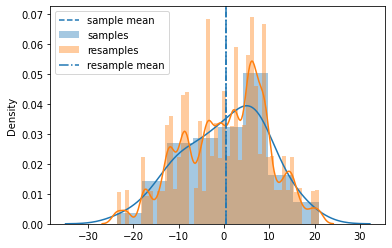

In [16]:
ax = plt.subplot(111)

ax.axvline(samples.mean(), ls='--', label='sample mean')
sns.distplot(samples, label="samples",ax=ax)

sns.distplot(resamples, label="resamples", ax=ax)
ax.axvline(resamples.mean(axis=1).mean(), ls='-.', label="resample mean")

plt.legend()
plt.show()

## Confidence Intervals

**Confidence level** the percentage/ limits of confidence intervals, expected to contain statistic of interest of the population

**Coverage level** How much data it needs to cover.

It is the interval that encloses the central x% of the bootstrap sampling distribution of sample statistic.


$CI = \bar{x} \pm z \frac{s}{\sqrt{n}}$

z = confidence level value

<AxesSubplot:ylabel='Density'>

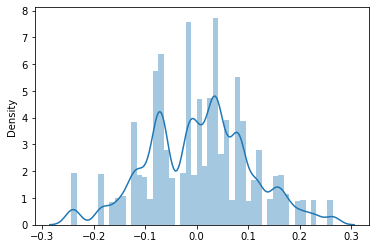

In [17]:
n = 100
samples = np.random.normal(scale=0.1,size=n) 

R = 200
resamples = np.random.choice(samples,size=(k,R),replace=True)

sns.distplot(resamples)